In [1]:
#import statements 
#most code from Guidos and Muller book, Intro to ML and DL 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [4]:


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1) #return 4 arrays for use in traingin 

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:


scaler = MinMaxScaler()


In [6]:
scaler.fit(X_train)

MinMaxScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)

#print-dataset properties 
print("transformed shape: {}".format(X_train_scaled.shape))

print("per-feature min before scaling:\n {}".format(X_train.min(axis=0)))
print("\n")

print("per-feature max before scaling:\n {}".format(X_train.max(axis=0)))
print("\n")

print("per-feature min after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("\n")

print("per-feature min after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature min before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]


per-feature max before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


per-feature min after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


per-feature min after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
#transform test data
X_test_scaled = scaler.transform(X_test)

print("per-feature min before scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("\n")

print("per-feature max before scaling:\n {}".format(X_test_scaled.max(axis=0)))
print("\n")

per-feature min before scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


per-feature max before scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]




In [9]:


X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C=100)
svm.fit(X_train, Y_train)

print("Test Set Accuracy: {:.2f}".format(svm.score(X_test, Y_test)))

Test Set Accuracy: 0.94


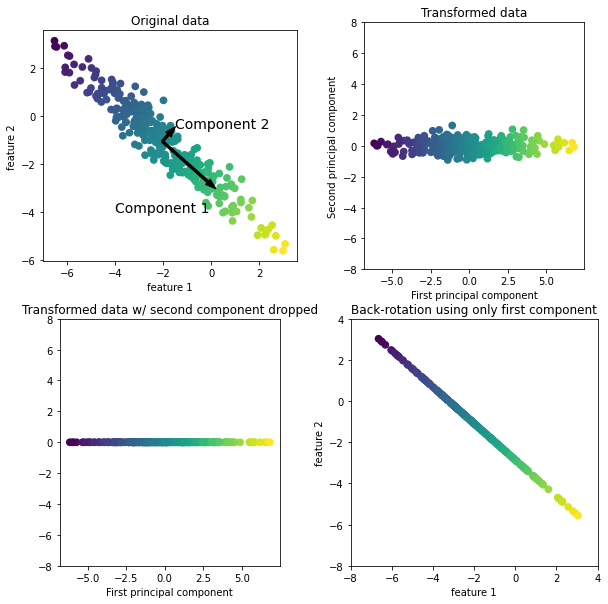

In [10]:
import mglearn
mglearn.plots.plot_pca_illustration()


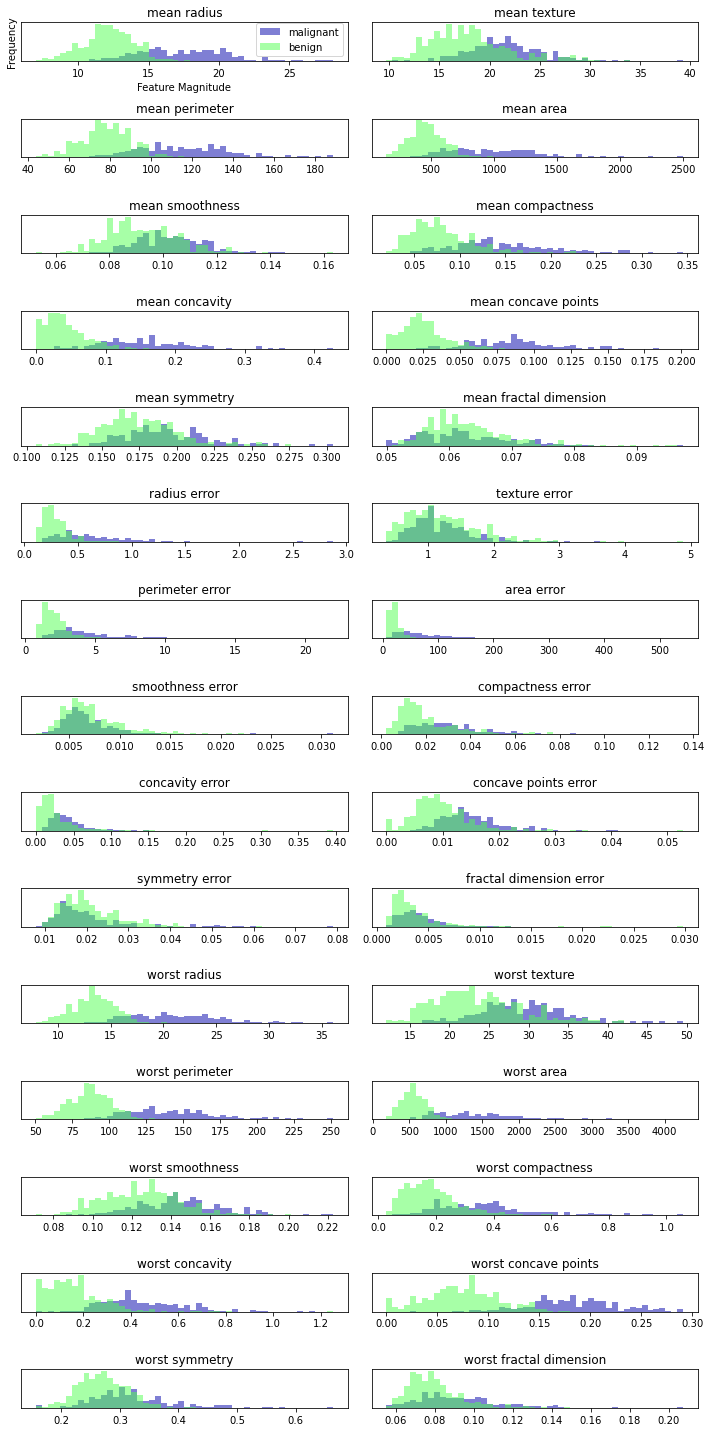

In [45]:
fig, axes = plt.subplots(15,2,figsize = (10,20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Frequency")

ax[0].legend(["malignant", "benign"], loc = "best")

fig.tight_layout()
    

In [13]:

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [17]:


pca = PCA(n_components = 2)

pca.fit(X_scaled)

#transform data on two PCA 
X_pca = pca.transform(X_scaled)

print("Original Shape: {}".format(str(X_scaled.shape)))
print("Reduced Shape: {}".format(str(X_pca.shape)))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


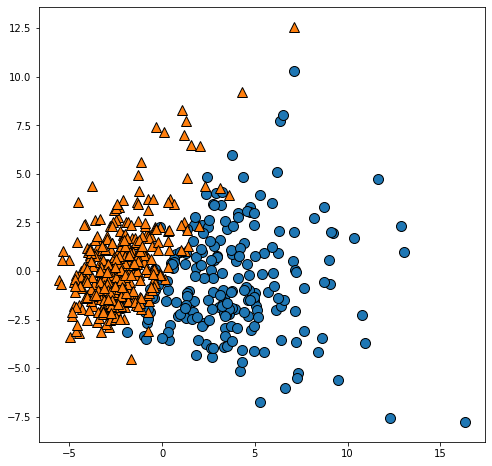

In [19]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)

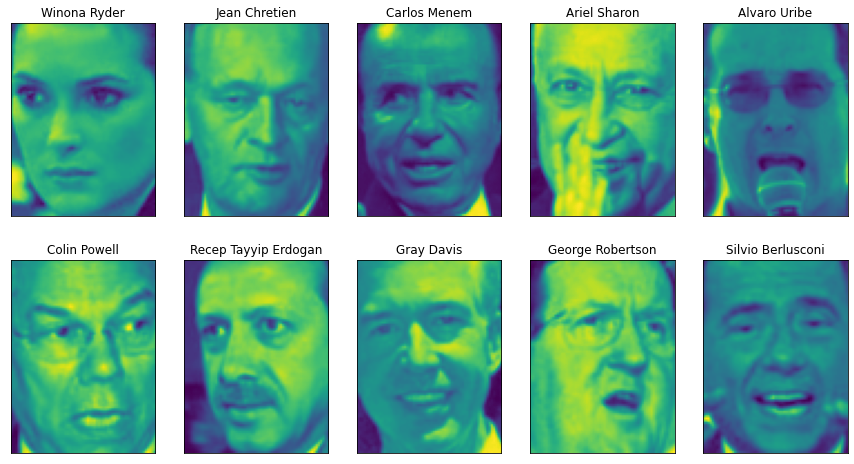

In [3]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape


fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [5]:
print("People Shape {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

#shows 3023 images that are 87x65
#62 differnet people 

People Shape (3023, 87, 65)
Number of classes: 62


In [9]:
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = '  ')
    if (i+1) % 2 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  
Amelie Mauresmo            21  Andre Agassi               36  
Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  
Bill Clinton               29  Carlos Menem               21  
Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  
George W Bush             530  Gerhard Schroeder         109  
Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  
Hans Blix                  39  Hugo Chavez                71  
Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  
Jennifer Aniston           21  Jennifer Capriati          42  
Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft           

/Users/davidan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/davidan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


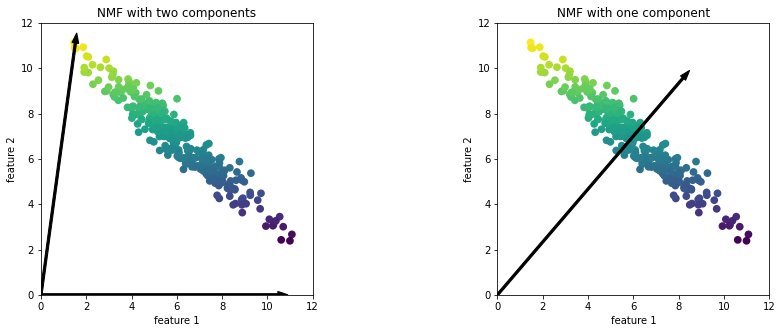

In [2]:
mglearn.plots.plot_nmf_illustration()


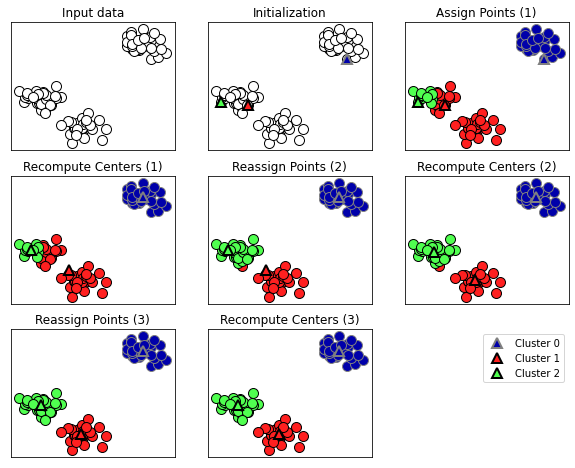

In [3]:
mglearn.plots.plot_kmeans_algorithm()


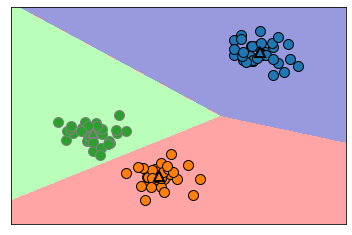

In [4]:
mglearn.plots.plot_kmeans_boundaries()
